In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


from enum import Enum
class inputType(Enum):
  BINARY=1
  BGR=2
input_type = inputType.BGR

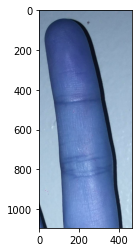

In [18]:
path = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/Result_1595884474_3/Result_1595884474_3/Result_1595884474_3_211_detected_fingertips_0.jpg"
path = "/home/lattard/PROJECTS/DATA/fingertip/skin/finger_1.jpg"
if input_type == inputType.BGR :
  #skin color range boundaries of the HSV pixel
  skin_col_low = np.array([0, 48, 80], dtype="uint8")
  skin_col_high = np.array([20, 255, 255], dtype="uint8")
  #load image
  rgb_frame = cv2.imread(path)
  plt.imshow(rgb_frame)

elif input_type == inputType.BINARY:
  #load image
  frame = cv2.imread('/content/drive/My Drive/finger-tip-detection/hand_binary.png', cv2.IMREAD_GRAYSCALE)
  th, binary_frame = cv2.threshold(frame, 0, 255, cv2.THRESH_BINARY)
  plt.imshow(binary_frame, cmap = 'gray')

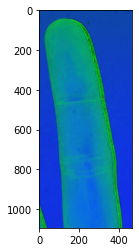

In [19]:
if input_type == inputType.BGR :
  #convert image to HSV
  converted = cv2.cvtColor(rgb_frame, cv2.COLOR_BGR2HSV)
  plt.imshow(converted)

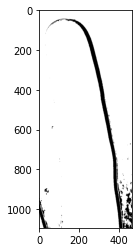

In [20]:
if input_type == inputType.BGR :
  #filter the image to get the skin area
  skin_mask = cv2.inRange(converted, skin_col_low, skin_col_high)
  plt.imshow(skin_mask, cmap='gray')

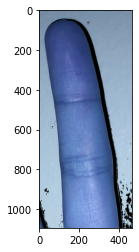

In [21]:
if input_type == inputType.BGR :
  skin = cv2.bitwise_and(rgb_frame, rgb_frame, mask = skin_mask)
  plt.imshow(skin)

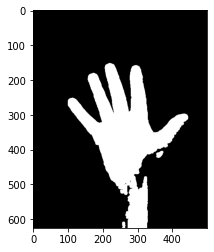

In [ ]:
if input_type == inputType.BGR :
  # apply a series of erosions and dilations to the mask
  # using an elliptical kernel
  #closing = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
  skin_mask_processed = cv2.erode(skin_mask, kernel, iterations = 1)
  skin_mask_processed = cv2.dilate(skin_mask, kernel, iterations = 1)
  plt.imshow(skin_mask_processed, cmap='gray')

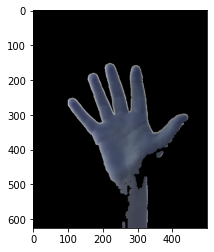

In [ ]:
if input_type == inputType.BGR :
  skin_morph = cv2.bitwise_and(rgb_frame, rgb_frame, mask = skin_mask_processed)
  plt.imshow(skin_morph)

In [ ]:
if input_type == inputType.BGR :
  contours, hierarchy  = cv2.findContours(skin_mask_processed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE);
  
elif input_type == inputType.BINARY :
  contours, hierarchy  = cv2.findContours(binary_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE);

1


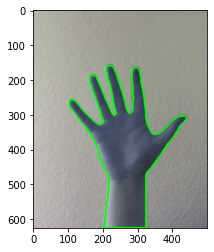

In [ ]:

img_contours = np.copy(rgb_frame)
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
plt.imshow(img_contours)

print(len(contours))

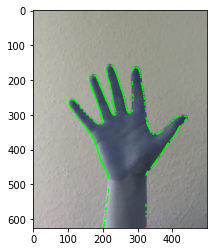

In [ ]:
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cnt=contours[max_index]

cv2.drawContours(rgb_frame, cnt, -1, (0,255,0), 3)
plt.imshow(rgb_frame)

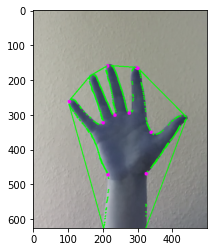

In [ ]:
hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

img_defects = np.copy(rgb_frame)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img_defects,start,end,[0,255,0],2)
    cv2.circle(img_defects,far,5,[255,0,255],-1)

plt.imshow(img_defects)